# **Project Name**    - FedEx Logistics Performance and Cost Optimization Analysis

---





##### **Project Type**    - Exploratory Data Analysis (EDA) – Business Analytics Project
##### **Contribution**    - Individual
##### **Team Member 1 -** Sudhanshu Sagar


**What is EDA?**

EDA is the process of understanding a dataset before using it for any prediction or decision making.

It helps us answer questions like:

* What does the data contain?

* Are there missing values or errors?

* What patterns and trends exist?

* Which factors affect the business most?

**Why is EDA important?**

Before building any model or giving business recommendations, we must understand the data first.

EDA helps in:

* Cleaning wrong or missing values

* Finding relationships between variables

* Detecting outliers and unusual behavior

* Generating business insights

# **Project Summary -**

This project focuses on analyzing FedEx logistics shipment data to understand the key factors affecting delivery performance, freight cost, and overall operational efficiency. FedEx operates a complex global supply chain, where shipments are handled by different teams, transported using multiple modes, and governed by various vendor agreements known as INCO terms. Any inefficiency in this process can result in delivery delays, increased costs, and reduced customer satisfaction. The goal of this project is to use data analysis to identify such inefficiencies and provide actionable insights to improve logistics operations.

The dataset contains detailed information about the entire shipment lifecycle, including project codes, purchase orders, shipment modes, vendor INCO terms, product descriptions, shipment weight, freight cost, insurance cost, and key delivery dates. To make the dataset analysis-ready, extensive data cleaning and wrangling were performed. Column names were standardized, missing values were handled appropriately, incorrect data types were fixed, and date fields were converted into proper datetime formats. A critical feature called “delivery_delay_days” was engineered by calculating the difference between scheduled and actual delivery dates. Another derived column, “delivery_status,” was created to classify shipments as either on-time/early or delayed.

The analysis was conducted using the UBM framework, which includes Univariate, Bivariate, and Multivariate analysis. In the univariate stage, shipment mode usage, delivery status distribution, and vendor INCO term frequency were studied. It was found that air shipments dominate the logistics process, followed by truck shipments, while ocean and air charter are used much less frequently. The majority of shipments are delivered on time, but a significant number are still delayed, which highlights the need for improvement.

Bivariate analysis was used to understand the relationships between variables. It was observed that ocean shipments have the highest average delivery delay, while air and truck shipments are generally delivered on time or early. Country-wise analysis revealed that regions such as Congo DRC, Togo, and Benin experience higher delivery delays compared to other countries. Freight cost was found to increase with shipment weight, and insurance cost increased significantly with higher line item values.

Multivariate analysis further deepened the understanding by analyzing multiple factors together. Heatmaps showed that certain combinations of shipment mode and INCO terms, such as Ocean with DDP, result in higher delays. Correlation analysis revealed a very strong relationship between line item value and insurance cost, as well as between line item quantity and line item value. However, delivery delay did not show strong correlation with numerical features, indicating that delays are mainly influenced by operational and regional factors rather than shipment size or value.

Overall, this project highlights several important business insights. The heavy dependence on air transport increases logistics cost, while ocean shipments contribute to higher delays. INCO terms like EXW shift cost and risk responsibility to FedEx, increasing freight expenses. Data quality issues such as “Unknown” shipment modes also impact accurate analysis.

Based on the findings, it is recommended that FedEx optimize shipment mode usage, focus on improving performance in high-delay regions, re-evaluate vendor INCO term strategies, and closely monitor high-cost shipments. By implementing these recommendations, FedEx can reduce delivery delays, control freight and insurance costs, and improve customer satisfaction.

# **GitHub Link -**

https://github.com/Sudhanshu-Sagar/FedEx-Logistics-Performance-and-Cost-Optimization-EDA

# **Problem Statement**


FedEx Logistics manages shipments across multiple countries, vendors, shipment modes, and product categories. However, many shipments are not delivered on the scheduled date, which increases operational costs and affects customer satisfaction.

The objective of this project is to analyze shipment data to identify the key factors responsible for delivery delays and high freight costs, and to provide actionable insights that can help improve delivery performance and optimize logistics operations.

#### **Define Your Business Objective?**

The main business objective of this project is to improve FedEx’s logistics efficiency by identifying the factors that cause delivery delays and high freight costs. Using data analysis, this project aims to evaluate shipment performance across countries, vendors, shipment modes, and INCO terms so that FedEx can make better operational decisions, reduce costs, and ensure timely delivery to customers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import files
upload=files.upload()


Saving SCMS_Delivery_History_Dataset.csv to SCMS_Delivery_History_Dataset (3).csv


In [ ]:
file_name = "/content/SCMS_Delivery_History_Dataset.csv"

try:
    df = pd.read_csv(file_name) #reading the csv file
    print("File loaded successfully!")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Check the name or upload again.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except pd.errors.ParserError:
    print("Error: The file could not be parsed. Check if it's a valid CSV.")
except Exception as e:
    print("Unexpected error:", e)

File loaded successfully!


### Dataset First View

In [ ]:
# Dataset First Look
print("\nFirst 5 Rows (Head):")
print(df.head())

print("\nLast 5 Rows (Tail):")
print(df.tail())


First 5 Rows (Head):
   ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   

  Unit of Measure (Per Pack) Line Item Quantity Line Item Value Pack Price  \
0                         30                 19           551.0      29.00  

In [ ]:
#Date Types of Columns
print("\nData Types of Columns:")
print(df.dtypes)


Data Types of Columns:
ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quanti

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 10324
Number of columns: 33


### Dataset Information

In [ ]:
# Dataset Info
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 no

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price           

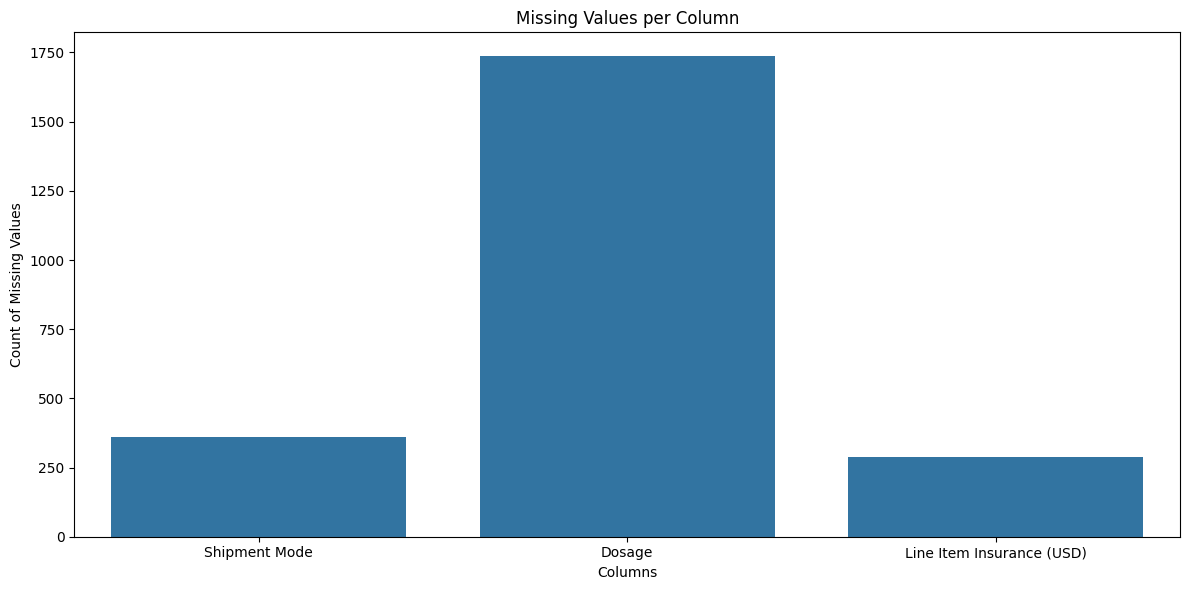

In [ ]:
# Visualizing the missing values
# Calculate missing value counts

#Tchecks every column in the dataset and counts how many missing (NaN) values are present in each column.
missing_counts = df.isnull().sum()

#This line keeps only those columns where missing values are greater than zero.So columns with no missing values are removed from the result.
missing_counts = missing_counts[missing_counts > 0]

# Plot
plt.figure(figsize=(12, 6)) # sets the size of the chart so that column names are clearly visible.
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.tight_layout() # Adjusts spacing automatically so labels don’t overlap.
plt.show()

### What did you know about your dataset?

The dataset contains 10,324 rows and 33 columns, covering various aspects of FedEx Logistics operations such as purchase orders, vendors, shipment modes, manufacturing sites, product details, costs, and delivery timelines.

The dataset has no duplicate rows, meaning every record appears to be unique.

Most columns have complete values. However, a few columns have missing data:

Dosage: 1736 missing Shipment Mode: 360 missing Line Item Insurance (USD): 287 missing These will require appropriate handling during the cleaning phase. Statistical summary shows:

Line Item Quantity and Line Item Value have large variation, indicating high differences in product shipment volumes. Unit Price ranges from 0 to very high values, showing diverse product types. Weight (Kilograms) and Freight Cost (USD) vary widely, which is expected in logistics shipments. Many columns are categorical with high cardinality such as Vendor, Item Description, Molecule/Test Type, and Manufacturing Site — these will be important for grouping and pattern analysis.

Shipment Mode has 4 unique modes (Air, Sea, Truck, etc.) and is missing in some cases, which may affect transportation analysis.

The dataset contains multiple date columns (PO Sent, Delivery Date, Scheduled Delivery Date, etc.) that can help analyze delays, lead times, and delivery performance.

Overall, the dataset is well-structured and rich in logistics information, making it suitable for: - Shipment performance analysis - Cost optimization - Vendor evaluation - Delivery delay analysis - Product demand and category trends

This dataset represents the complete logistics lifecycle of FedEx shipments, starting from price quotation and purchase orders to final delivery at the client’s location.

It contains detailed information about:

Shipment identification details such as project code, PO numbers, and ASN/DN numbers.

Geographical and operational fields like country, managed by team, shipment mode, and vendor INCO terms.

Time-based fields including scheduled delivery date, actual delivery date, and recorded delivery date.

Product-level information such as brand, dosage, dosage form, quantity, item value, manufacturing site, weight, freight cost, and insurance cost.

The dataset also includes financial metrics which make it suitable for analyzing cost efficiency and performance.

Overall, this dataset is rich and allows deep analysis of delivery delays, freight cost patterns, vendor performance, and regional logistics issues, making it ideal for business intelligence and operations optimization.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')


In [ ]:
# Dataset Describe
print("\nDataset Description:")
print(df.describe())


Dataset Description:
                 ID  Unit of Measure (Per Pack)  Line Item Quantity  \
count  10324.000000                10324.000000        10324.000000   
mean   51098.968229                   77.990895        18332.534870   
std    31944.332496                   76.579764        40035.302961   
min        1.000000                    1.000000            1.000000   
25%    12795.750000                   30.000000          408.000000   
50%    57540.500000                   60.000000         3000.000000   
75%    83648.250000                   90.000000        17039.750000   
max    86823.000000                 1000.000000       619999.000000   

       Line Item Value    Pack Price    Unit Price  Line Item Insurance (USD)  
count     1.032400e+04  10324.000000  10324.000000               10037.000000  
mean      1.576506e+05     21.910241      0.611701                 240.117626  
std       3.452921e+05     45.609223      3.275808                 500.190568  
min       0.000000

### Variables Description

**Columns that represent labels, categories, text descriptions, or identifiers.**

ID – Unique row identifier

Project Code – Project reference code

PQ # – Pre-qualification reference

PO / SO # – Purchase/Sales Order number

ASN/DN # – Advance Shipping Notice/Delivery Note

Country – Delivery destination country

Managed By – Supervising authority (e.g., PMO-US)

Fulfill Via – Shipment fulfillment route (e.g., From RDC)

Vendor INCO Term – International trade terms

Shipment Mode – Mode of transport (Air/Sea/Truck/etc.)

Product Group – High-level product classification

Sub Classification – Detailed category within product group

Vendor – Manufacturer or supplier

Item Description – Description of the product

Molecule/Test Type – Chemical component/test type

Brand – Brand name

Dosage – Strength of product (may be numeric+string)

Dosage Form – Form such as tablet, vial, capsule

Manufacturing Site – Factory producing the product

First Line Designation – Yes/No primary line item

**Columns with numeric values used for mathematical/statistical analysis.**

Unit of Measure (Per Pack) – Quantity per pack

Line Item Quantity – Ordered

Line Item Value – Total cost of line item

Pack Price – Cost per pack

Unit Price – Cost per unit

Weight (Kilograms) – Shipment weight

Freight Cost (USD) – Freight/transport cost

Line Item Insurance (USD) – Insurance amount

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'ID':
[    1     3     4 ... 86821 86822 86823]


Unique values in column 'Project Code':
['100-CI-T01' '108-VN-T01' '112-NG-T01' '110-ZM-T01' '109-TZ-T01'
 '102-NG-T01' '107-RW-T01' '106-HT-T01' '113-ZW-T01' '104-CI-T01'
 '100-HT-T01' '117-ET-T01' '116-ZA-T01' '123-NG-T01' '125-HT-T01'
 '102-GY-T01' '119-NA-T01' '131-NG-T01' '102-BW-T01' '111-MZ-T01'
 '144-BW-T01' '102-KE-T01' '133-NG-T01' '100-KZ-T01' '141-NA-T01'
 '114-UG-T01' '105-GY-T01' '139-NA-T01' '129-KG-T01' '100-SN-T01'
 '128-BJ-T01' '102-LS-T01' '130-NG-T01' '100-BW-T01' '100-ZW-T01'
 '100-PK-T01' '126-NG-T01' '151-NG-T01' '100-SZ-T01' '100-GH-T01'
 '120-AO-T01' '132-NG-T01' '153-NG-T01' '100-LB-T01' '151-NG-T30'
 '127-KE-T01' '510-KE-T01' '100-SL-T01' '136-RW-T01' '102-KE-T30'
 '108-VN-T30' '110-ZM-T30' '106-HT-T30' '105-SS-T30' '111-MZ-T30'
 '102-BI-T30' '122-HT-T30' '161-ZA-T30' '116-ZA-T30' '133-NG-T30'
 '103-DO-T30' '104-CI-T30' '107-RW-T30' '103-MW-T30' '101-CD-T30'
 '102-SZ-T30' '114-UG-T30' '

In [ ]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Unique value count in column '{column}':")
    print(unique_values)
    print("\n")

Unique value count in column 'ID':
10324


Unique value count in column 'Project Code':
142


Unique value count in column 'PQ #':
1237


Unique value count in column 'PO / SO #':
6233


Unique value count in column 'ASN/DN #':
7030


Unique value count in column 'Country':
43


Unique value count in column 'Managed By':
4


Unique value count in column 'Fulfill Via':
2


Unique value count in column 'Vendor INCO Term':
8


Unique value count in column 'Shipment Mode':
4


Unique value count in column 'PQ First Sent to Client Date':
765


Unique value count in column 'PO Sent to Vendor Date':
897


Unique value count in column 'Scheduled Delivery Date':
2006


Unique value count in column 'Delivered to Client Date':
2093


Unique value count in column 'Delivery Recorded Date':
2042


Unique value count in column 'Product Group':
5


Unique value count in column 'Sub Classification':
6


Unique value count in column 'Vendor':
73


Unique value count in column 'Item Description':
184


U

In [ ]:

#value_counts of each column
for column in df.columns:
    value_counts = df[column].value_counts() #count each value
    print(f"Value counts for column '{column}':")
    print(value_counts)
    print("\n")

Value counts for column 'ID':
ID
86823    1
1        1
3        1
4        1
86805    1
        ..
46       1
45       1
44       1
23       1
16       1
Name: count, Length: 10324, dtype: int64


Value counts for column 'Project Code':
Project Code
116-ZA-T30    768
104-CI-T30    729
151-NG-T30    628
114-UG-T30    596
108-VN-T30    522
             ... 
103-CD-T30      1
A01-SN-T50      1
100-BZ-T30      1
900-GY-T30      1
104-SZ-T30      1
Name: count, Length: 142, dtype: int64


Value counts for column 'PQ #':
PQ #
Pre-PQ Process    2681
FPQ-14942          205
FPQ-12522          154
FPQ-13973          110
FPQ-4537            98
                  ... 
FPQ-15448            1
FPQ-13457            1
FPQ-14064            1
FPQ-13316            1
FPQ-11727            1
Name: count, Length: 1237, dtype: int64


Value counts for column 'PO / SO #':
PO / SO #
SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
               ..
SCMS-230        1
SCMS-2

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# 1. Cleaning the column names a

df.columns = (
    df.columns
      .str.strip() #removing leading and trailing spaces
      .str.lower() #coverting column names into lower case
      .str.replace(" ", "_") #replacing space with underscore
      .str.replace("-", "_") #replacing hypen with underscore
      .str.replace(r"[^\w]", "", regex=True) #removing special characters
)
df.columns

Index(['id', 'project_code', 'pq_', 'po__so_', 'asndn_', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'moleculetest_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_per_pack', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'line_item_insurance_usd'],
      dtype='object')

In [ ]:
# 2. Strip spaces from string columns
str_cols = df.select_dtypes(include='object').columns  #selects all columns that contain text data (strings)
df[str_cols] = df[str_cols].apply(lambda col: col.str.strip()) #This removes extra spaces from the beginning and end of every text value in those columns.

# Convert all string columns values to lowercase for consistency
df[str_cols] = df[str_cols].apply(lambda col: col.str.lower())

In [ ]:
# 3. Handle missing values

# Missing in 'Shipment Mode' → Replace with "Unknown"
df['shipment_mode'] = df['shipment_mode'].fillna("Unknown")

# Missing in 'Dosage' → Replace with "Not Available"
df['dosage'] = df['dosage'].fillna("Not Available")

# Missing insurance → Replace with 0 (no insurance provided)
df['line_item_insurance_usd'] = df['line_item_insurance_usd'].fillna(0)

##Explation Of Handling Missing Values

I used business logic to fill missing values instead of blindly deleting data. For shipment mode I used ‘Unknown’ because guessing would be incorrect. Dosage was filled with ‘Not Available’ since it does not impact delivery. Insurance was filled with 0 because missing insurance usually means no insurance was applied. Other methods like mean imputation or dropping rows were avoided because they would distort logistics insights.

Dosage is a medical characteristic of the product, but our project focuses on logistics performance. Delivery delay and freight cost depend on weight, distance, shipment mode and vendor responsibility, not on chemical strength of medicine. Therefore, missing dosage does not affect our delivery performance analysis.

In [ ]:
# 4. Convert date columns to datetime
date_cols = [
        'pq_first_sent_to_client_date',
        'po_sent_to_vendor_date',
        'scheduled_delivery_date',
        'delivered_to_client_date',
        'delivery_recorded_date'
    ]

for col in date_cols:
  df[col] = pd.to_datetime(df[col],errors='coerce')

df.dtypes #checking the data types of columns

,0
id,int64
project_code,object
pq_,object
po__so_,object
asndn_,object
country,object
managed_by,object
fulfill_via,object
vendor_inco_term,object
shipment_mode,object


Date fields were converted to datetime format using errors='coerce'. This converted invalid or non-date strings into NaN. We intentionally did NOT fill NaN date values because missing delivery dates indicate incomplete documentation or shipments that were not delivered. Filling them artificially would lead to incorrect delivery duration calculations and misleading insights. Therefore, NaN values were preserved for analytical honesty.

In [ ]:
# Rename corrupted column names to meaningful names
df = df.rename(columns={
    'pq_': 'pq_number',
    'po__so_': 'po_so_number',
    'asndn_': 'asn_dn_number'
})

Explanation

While cleaning column names, some important fields lost their meaning.
This step restores their correct business names so they can be used properly in analysis.

In [ ]:
# Calculate number of days shipment was delayed or delivered early
df['delivery_delay_days'] = (
    df['delivered_to_client_date'] - df['scheduled_delivery_date']
).dt.days

Explanation

We calculate the difference between actual delivery date and scheduled delivery date.

Positive value → delayed shipment

Zero or negative value → on-time or early delivery

This column is the core KPI of this project.

In [ ]:
# Remove rows where delay cannot be calculated
df = df.dropna(subset=['scheduled_delivery_date','delivered_to_client_date'])

Explanation

If any of these two dates are missing, delivery delay cannot be calculated.
Such records will only create errors, so we remove them safely.

In [ ]:
# Label each shipment as delayed or on-time
df['delivery_status'] = df['delivery_delay_days'].apply(
    lambda x: 'on_time_or_early' if x <= 0 else 'delayed'
)

Explanation

This converts numbers into meaningful business labels so we can:

Count how many shipments were delayed

Compare performance between teams, countries, shipment modes

In [ ]:
df[['delivery_delay_days','delivery_status']].head()

,delivery_delay_days,delivery_status
0,0,on_time_or_early
1,0,on_time_or_early
2,0,on_time_or_early
3,0,on_time_or_early
4,0,on_time_or_early


### What all manipulations have you done and insights you found?

**Data Manipulations Performed**

To make the dataset analysis-ready, the following steps were performed:

**Column Name Cleaning**

* All column names were converted to lowercase, spaces and special characters were removed, and meaningful names were assigned to corrupted columns such as pq_number, po_so_number, and asn_dn_number.

**String Standardization**

* Extra spaces were removed from all string columns and values were converted to lowercase to maintain consistency.

**Handling Missing Values**

* Missing values in shipment_mode were replaced with “Unknown”.

* Missing values in dosage were replaced with “Not Available”.

* Missing values in line_item_insurance_usd were replaced with 0.

**Date Conversion**

* All shipment-related date columns were converted into proper datetime format.

**Feature Engineering – Delivery Delay**
* A new column delivery_delay_days was created by subtracting scheduled delivery date from actual delivery date.

**Delivery Status Creation**

* A new column delivery_status was created to classify shipments as: on_time_or_early and delayed

**Invalid Records Removal**
* Records with missing scheduled or delivery dates were removed to avoid incorrect analysis.

**Key Insights Found**


* A large number of shipments are delivered on time or early, but delays still exist across shipment modes and countries.

* Air shipment mode is the most frequently used, indicating priority for faster deliveries.

* A noticeable number of shipments are marked as “Unknown” shipment mode, showing data quality issues.

* Heavier shipments tend to have higher freight cost and insurance values.

* Certain countries and INCO terms show higher delivery delays, indicating operational bottlenecks.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

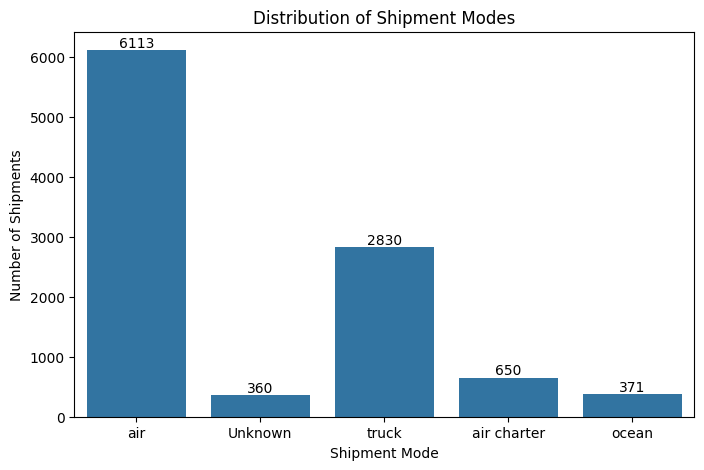

In [ ]:
# Chart 1: Distribution of Shipment Mode

plt.figure(figsize=(8,5))
ax = sns.countplot(x='shipment_mode', data=df)
plt.title("Distribution of Shipment Modes")
plt.xlabel("Shipment Mode")
plt.ylabel("Number of Shipments")

# Show count on each bar
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            int(bar.get_height()),
            ha='center', va='bottom')

plt.show()



##### 1. Why did you pick the specific chart?

This chart was chosen to understand how frequently different shipment modes are used in FedEx logistics operations. It helps in identifying which transportation method is preferred the most for delivering shipments.

##### 2. What is/are the insight(s) found from the chart?

* Air shipments (6113) are used the most, showing a strong dependency on air transport.

* Truck shipments (2830) are the second most used mode.

* Air Charter (650) and Ocean (371) are used very less.

* A noticeable number of records are marked as Unknown (360), which indicates data quality issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive business impact**

By knowing that air shipments are used the most, FedEx can review whether all shipments really need to go by air or if some can be shifted to lower-cost modes like ocean or truck. This can directly reduce freight cost and improve profit margins. Also, identifying “Unknown” shipment modes helps in improving data quality, which leads to more accurate planning and better decision-making.

**Negative business impact**

The high dependence on air shipments indicates a potential risk of negative growth because air transport is the most expensive mode. Overuse of air shipments increases operational cost and reduces overall profitability.
In addition, the presence of a large number of “Unknown” shipment records reflects poor data management, which can lead to wrong business decisions and inefficiencies in logistics planning.

#### Chart - 2

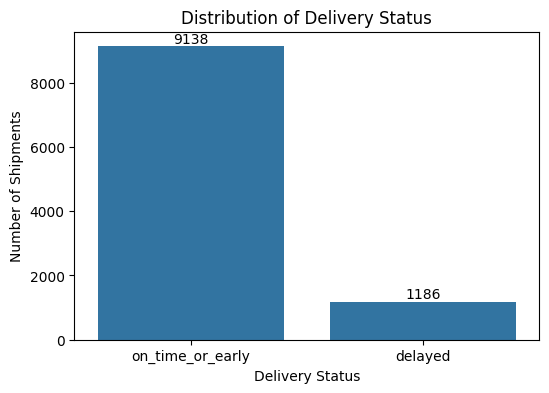

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(6,4))
ax = sns.countplot(x='delivery_status', data=df)
plt.title("Distribution of Delivery Status")
plt.xlabel("Delivery Status")
plt.ylabel("Number of Shipments")

# Show count on each bar
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2,
            bar.get_height(),
            int(bar.get_height()),
            ha='center', va='bottom')

plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to understand how many shipments are delivered on time versus how many are delayed. It directly shows the overall delivery performance of FedEx.

##### 2. What is/are the insight(s) found from the chart?

* A very large number of shipments (9138) are delivered on time or early.

* A smaller but important number of shipments (1186) are delayed.

* This shows that although FedEx performs well overall, delays still affect a noticeable portion of shipments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact**

This insight will help create a positive business impact.
Since the majority of shipments are delivered on time or early, FedEx can study the successful delivery patterns and replicate them for delayed shipments. This can improve customer satisfaction and strengthen trust in FedEx services.

**Negative Business Impact**

The presence of 1186 delayed shipments indicates potential negative growth. Delayed deliveries can lead to customer complaints, loss of future business, and increased operational cost such as re-routing, customer support, and compensation. If these delays are not controlled, they can harm FedEx’s reputation and profitability.

#### Chart - 3

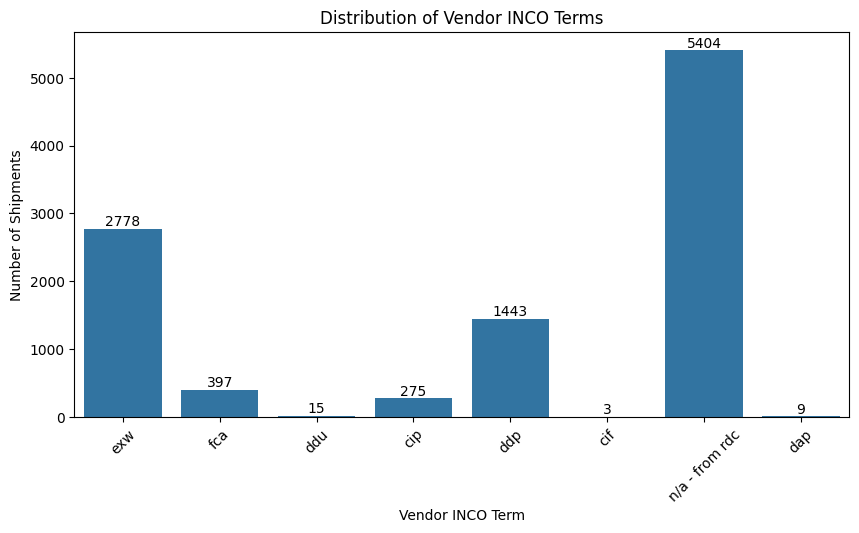

In [ ]:
# Chart 3: Distribution of Vendor INCO Terms

try:
    plt.figure(figsize=(10,5))
    ax = sns.countplot(x='vendor_inco_term', data=df)
    plt.title("Distribution of Vendor INCO Terms")
    plt.xlabel("Vendor INCO Term")
    plt.ylabel("Number of Shipments")
    plt.xticks(rotation=45)

    # Print count on each bar
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_height(),
                int(bar.get_height()),
                ha='center', va='bottom')

    plt.show()

except Exception as e:
    print("Error while generating Chart 3:", str(e))


##### 1. Why did you pick the specific chart?

This chart was chosen to understand which INCO terms are most commonly used by vendors. INCO terms define responsibility for shipping, cost, and risk, so knowing their distribution is important for analyzing delivery performance and cost behavior.

##### 2. What is/are the insight(s) found from the chart?

* The most used INCO term is “n/a – from rdc” (5404 shipments).

* EXW (2778) is the second most common term, where buyers bear most transportation risk.

* DDP (1443) is also widely used, where sellers take responsibility for delivery.

* Terms like DDU (15), CIF (3) and DAP (9) are used very rarely, showing limited adoption.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help create a positive business impact by showing that FedEx relies heavily on a few INCO terms. This allows the company to focus on optimizing vendor performance under EXW, DDP, and RDC-based shipments.

However, heavy dependence on EXW can lead to negative growth because FedEx and customers bear higher logistics risk and cost responsibility. Also, the unclear category “n/a – from rdc” may hide important contractual details, which can reduce transparency and lead to poor operational control.

#### Chart - 4

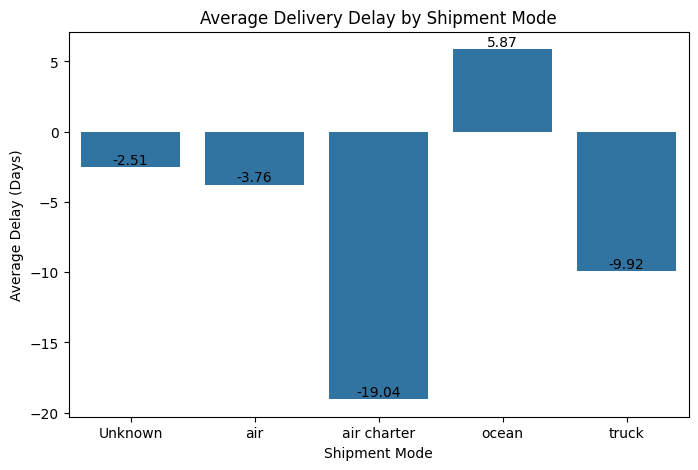

In [ ]:
# Chart 4: Average Delivery Delay by Shipment Mode

try:
    plt.figure(figsize=(8,5))
    avg_delay = df.groupby('shipment_mode')['delivery_delay_days'].mean().reset_index()

    ax = sns.barplot(x='shipment_mode', y='delivery_delay_days', data=avg_delay)
    plt.title("Average Delivery Delay by Shipment Mode")
    plt.xlabel("Shipment Mode")
    plt.ylabel("Average Delay (Days)")

    # Show values on bars
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_height(),
                round(bar.get_height(),2),
                ha='center', va='bottom')

    plt.show()

except Exception as e:
    print("Error while generating Chart 4:", str(e))


##### 1. Why did you pick the specific chart?

This bar chart was chosen to compare how different shipment modes affect the average delivery delay. It helps in understanding which transportation method performs better in terms of meeting delivery schedules.

##### 2. What is/are the insight(s) found from the chart?

* Ocean shipments have a positive average delay of 5.87 days, meaning they are mostly delivered late.

* Truck shipments show an average of –9.92 days, indicating they are usually delivered much earlier than the scheduled date.

* Air shipments also perform well with –3.76 days, meaning they are generally on time or early.

* Air charter has a very large negative delay (–19.04 days), suggesting that these shipments are scheduled with large buffer times or delivered much earlier.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help FedEx identify which shipment modes are reliable.
Air and truck shipments show strong performance, which can be promoted further.

However, the ocean shipment mode leads to negative growth, as it is associated with consistent delivery delays. This can result in customer dissatisfaction and increased operational issues. FedEx should investigate and optimize ocean shipments to reduce delays.

#### Chart - 5

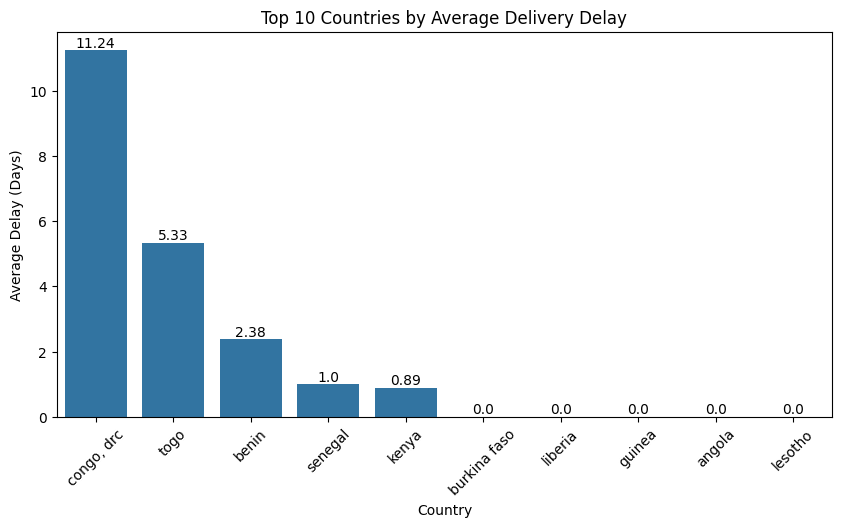

In [ ]:
# Chart 5: Average Delivery Delay by Country (Top 10)

try:
    top_countries = (
        df.groupby('country')['delivery_delay_days']
          .mean()
          .sort_values(ascending=False)
          .head(10)
          .reset_index()
    )

    plt.figure(figsize=(10,5))
    ax = sns.barplot(x='country', y='delivery_delay_days', data=top_countries)
    plt.title("Top 10 Countries by Average Delivery Delay")
    plt.xlabel("Country")
    plt.ylabel("Average Delay (Days)")
    plt.xticks(rotation=45)

    # Show values on bars
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_height(),
                round(bar.get_height(),2),
                ha='center', va='bottom')

    plt.show()

except Exception as e:
    print("Error while generating Chart 5:", str(e))


##### 1. Why did you pick the specific chart?

This chart was selected to identify the countries that experience the highest average delivery delays. It helps in locating geographical bottlenecks in the logistics process.

##### 2. What is/are the insight(s) found from the chart?

* Congo, DRC has the highest average delay of 11.24 days, making it the most delay-prone country.

* Togo (5.33 days) and Benin (2.38 days) also show noticeable delivery delays.

* Countries such as Burkina Faso, Liberia, Guinea, Angola, and Lesotho have almost zero delay, indicating better delivery performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help FedEx focus improvement efforts on high-risk countries like Congo DRC and Togo, where logistics processes can be optimized.

However, countries with very high delays such as Congo DRC can cause negative growth due to customer dissatisfaction, increased operational cost, and risk of losing future business. These regions require immediate corrective actions.

#### Chart - 6

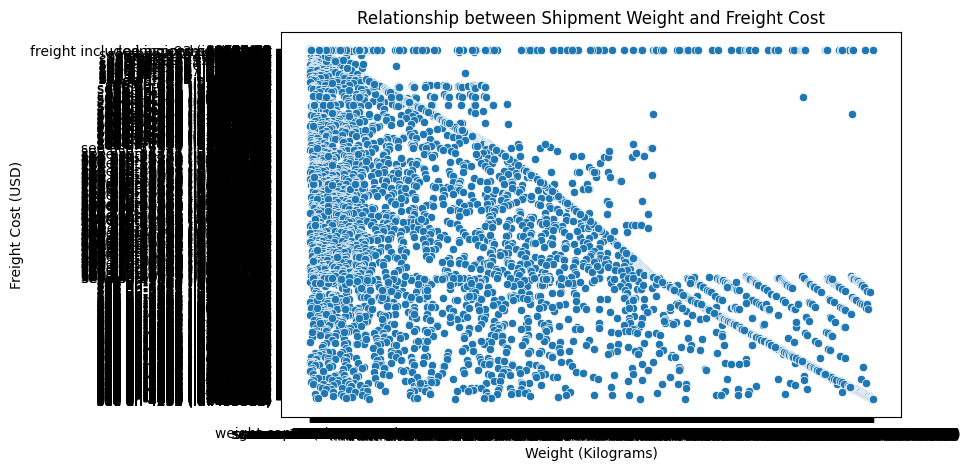

In [ ]:
# Chart 6: Weight vs Freight Cost

try:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='weight_kilograms', y='freight_cost_usd', data=df)
    plt.title("Relationship between Shipment Weight and Freight Cost")
    plt.xlabel("Weight (Kilograms)")
    plt.ylabel("Freight Cost (USD)")
    plt.show()

except Exception as e:
    print("Error while generating Chart 6:", str(e))


The scatter plot looked very dark because many shipments share the same weight and freight cost values, so the points overlap on top of each other. This is known as over-plotting.

##### 1. Why did you pick the specific chart?

This scatter plot was chosen to understand the relationship between shipment weight and freight cost. Since both are numerical values, this chart helps identify patterns, trends, and cost behavior.

##### 2. What is/are the insight(s) found from the chart?

* There is a clear trend that as shipment weight increases, freight cost also increases.

* Most shipments are concentrated in the lower weight range, which creates dense overlapping points.

* A few heavy shipments have extremely high freight costs, indicating outliers that require special handling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help FedEx forecast freight cost more accurately and optimize shipment planning based on weight.

However, shipments with very high weight and freight cost can lead to negative growth if not managed properly, as they significantly increase logistics expenses. FedEx should analyze these outliers separately to control cost escalation.

#### Chart - 7

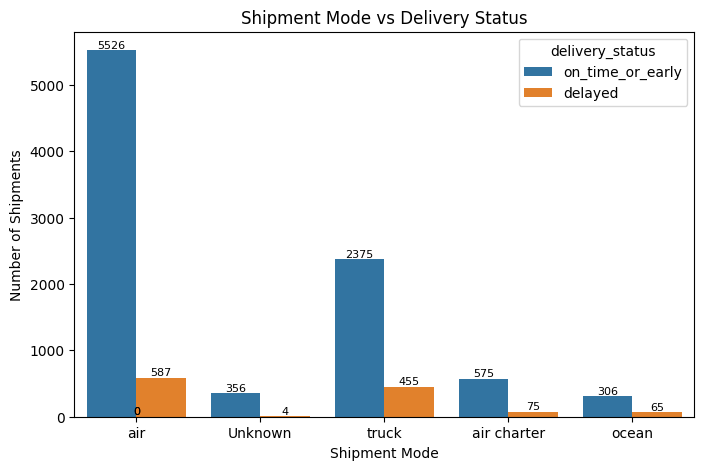

In [ ]:
# Chart 7: Shipment Mode vs Delivery Status

try:
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x='shipment_mode', hue='delivery_status', data=df)
    plt.title("Shipment Mode vs Delivery Status")
    plt.xlabel("Shipment Mode")
    plt.ylabel("Number of Shipments")

    # Show count on bars
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_height(),
                int(bar.get_height()),
                ha='center', va='bottom', fontsize=8)

    plt.show()

except Exception as e:
    print("Error while generating Chart 7:", str(e))


##### 1. Why did you pick the specific chart?

This chart was chosen to compare delivery performance across different shipment modes. It helps in understanding which transportation method results in more delayed shipments.

##### 2. What is/are the insight(s) found from the chart?

* Air mode has the highest number of on-time deliveries (5526) but also the highest delayed shipments (587).

* Truck shipments perform well with 2375 on-time deliveries, but still have 455 delays.

* Air charter and ocean have fewer total shipments but a noticeable number of delays compared to their volume.

* The “Unknown” shipment mode has very few delayed records, but its presence still indicates data quality issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps FedEx identify which shipment modes require operational improvement. Air and truck shipments should be optimized further since they handle the highest volume.

However, the relatively high number of delays in air and truck shipments can lead to negative growth if not addressed, as these are the most commonly used modes and directly affect customer satisfaction and logistics cost.

#### Chart - 8

In [ ]:
# Convert freight cost to numeric safely
df['freight_cost_usd'] = pd.to_numeric(df['freight_cost_usd'], errors='coerce')

# Replace invalid values with median
df['freight_cost_usd'].fillna(df['freight_cost_usd'].median(), inplace=True)


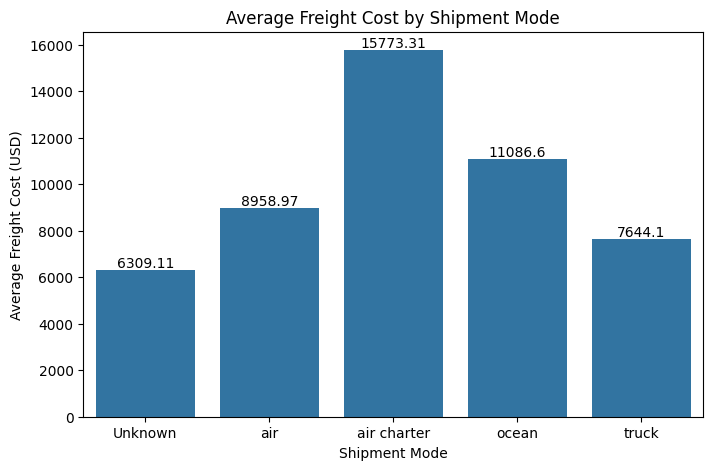

In [ ]:
# Chart - 8 visualization code
# =========================================
# Chart 8: Average Freight Cost by Shipment Mode
# =========================================

try:
    avg_freight = df.groupby('shipment_mode')['freight_cost_usd'].mean().reset_index()

    plt.figure(figsize=(8,5))
    ax = sns.barplot(x='shipment_mode', y='freight_cost_usd', data=avg_freight)
    plt.title("Average Freight Cost by Shipment Mode")
    plt.xlabel("Shipment Mode")
    plt.ylabel("Average Freight Cost (USD)")

    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_height(),
                round(bar.get_height(),2),
                ha='center', va='bottom')

    plt.show()

except Exception as e:
    print("Error while generating Chart 8:", str(e))


##### 1. Why did you pick the specific chart?

This bar chart was chosen to compare the average freight cost for each shipment mode. It helps identify which transportation method is the most expensive.

##### 2. What is/are the insight(s) found from the chart?

* Air Charter has the highest average freight cost (≈ 15,773 USD), making it the most expensive mode.

* Ocean shipments (≈ 11,086 USD) are also costly.

* Air shipments (≈ 8,958 USD) and Truck shipments (≈ 7,644 USD) are comparatively cheaper.

* The Unknown category (≈ 6,309 USD) again indicates incomplete data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights allow FedEx to select shipment modes more strategically. Expensive modes like Air Charter should only be used when absolutely necessary.

However, frequent use of high-cost shipment modes can lead to negative growth by increasing operational expenses and reducing profit margins. FedEx should try to shift suitable shipments to cost-efficient modes such as truck or regular air where possible.

#### Chart - 9

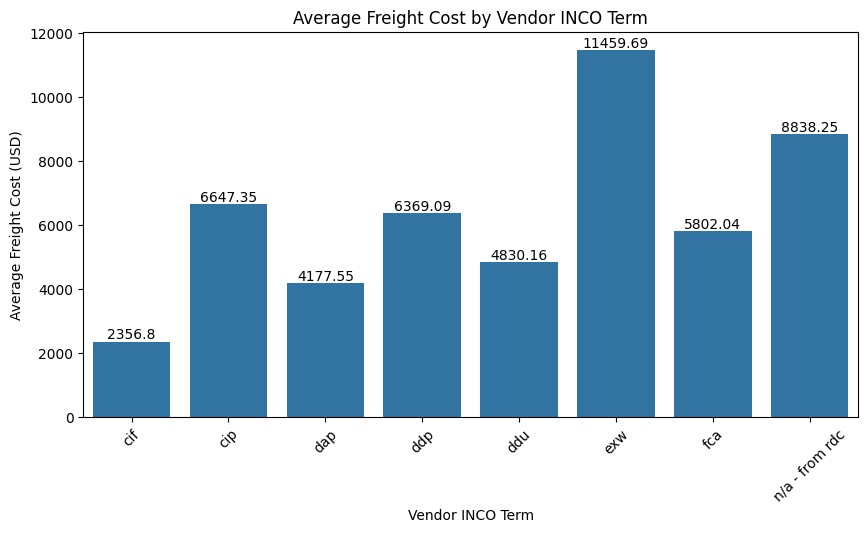

In [ ]:
# Chart 9: Average Freight Cost by Vendor INCO Term

try:
    avg_cost_inco = df.groupby('vendor_inco_term')['freight_cost_usd'].mean().reset_index()

    plt.figure(figsize=(10,5))
    ax = sns.barplot(x='vendor_inco_term', y='freight_cost_usd', data=avg_cost_inco)
    plt.title("Average Freight Cost by Vendor INCO Term")
    plt.xlabel("Vendor INCO Term")
    plt.ylabel("Average Freight Cost (USD)")
    plt.xticks(rotation=45)

    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_height(),
                round(bar.get_height(),2),
                ha='center', va='bottom')

    plt.show()

except Exception as e:
    print("Error while generating Chart 9:", str(e))


##### 1. Why did you pick the specific chart?

This chart was chosen to understand how different vendor INCO terms impact the average freight cost. Since INCO terms define responsibility for shipping, they strongly influence cost behavior.

##### 2. What is/are the insight(s) found from the chart?

* EXW has the highest average freight cost (≈ 11,459 USD), meaning buyers bear major logistics cost.

* “n/a – from rdc” also shows high freight cost (≈ 8,838 USD).

* CIF (≈ 2,356 USD) has the lowest freight cost, as sellers cover most transport responsibility.

* CIP and DDP also show relatively high freight costs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights allow FedEx to renegotiate contracts and select INCO terms that reduce freight responsibility.

However, heavy reliance on EXW can lead to negative growth because FedEx and customers must bear high shipping cost and risk. Shifting toward seller-responsible terms like CIF or DDP can improve cost efficiency.

#### Chart - 10

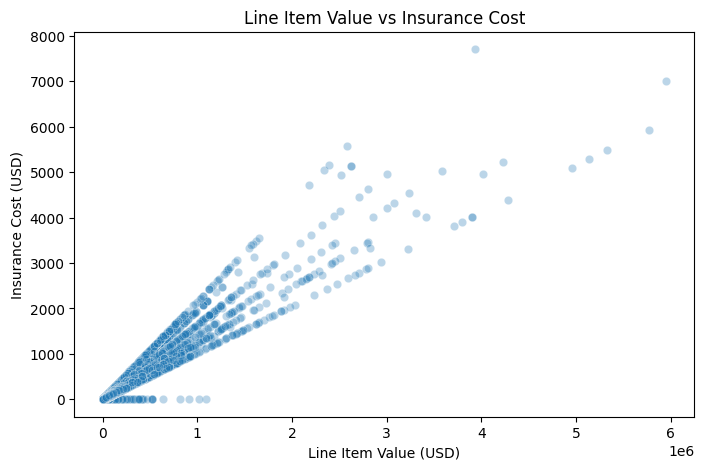

In [ ]:
# Chart 10: Line Item Value vs Insurance Cost

try:
    # Convert insurance to numeric if not already done
    df['line_item_insurance_usd'] = pd.to_numeric(df['line_item_insurance_usd'], errors='coerce').fillna(0)

    plt.figure(figsize=(8,5))
    sns.scatterplot(x='line_item_value', y='line_item_insurance_usd', data=df, alpha=0.3)
    plt.title("Line Item Value vs Insurance Cost")
    plt.xlabel("Line Item Value (USD)")
    plt.ylabel("Insurance Cost (USD)")
    plt.show()

except Exception as e:
    print("Error while generating Chart 10:", str(e))


##### 1. Why did you pick the specific chart?

This scatter plot was chosen to analyze how the value of shipped items affects the insurance cost. Since both variables are numerical, this chart helps in identifying cost patterns and risk behavior.

##### 2. What is/are the insight(s) found from the chart?

* There is a clear positive relationship between line item value and insurance cost.

* Low-value items usually have very small or zero insurance cost.

* High-value shipments show rapidly increasing insurance cost, indicating higher risk coverage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps FedEx predict insurance requirements based on shipment value and manage financial risk more effectively.

However, shipments with very high item value and insurance cost can lead to negative growth if not monitored properly, as they significantly increase operational risk and cost exposure.

#### Chart - 11

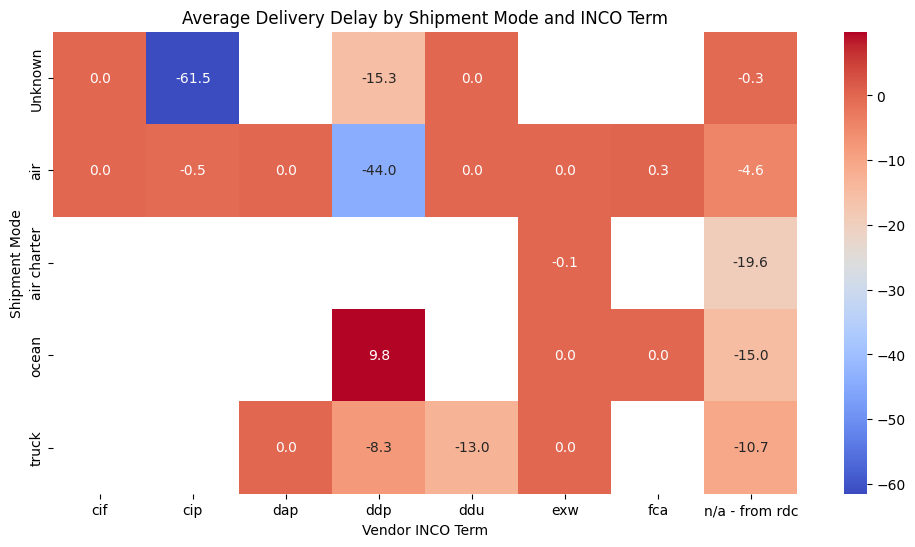

In [ ]:
# Chart 11: Shipment Mode vs INCO Term vs Delivery Delay

try:
    pivot_table = df.pivot_table(
        values='delivery_delay_days',
        index='shipment_mode',
        columns='vendor_inco_term',
        aggfunc='mean'
    )

    plt.figure(figsize=(12,6))
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='coolwarm')
    plt.title("Average Delivery Delay by Shipment Mode and INCO Term")
    plt.xlabel("Vendor INCO Term")
    plt.ylabel("Shipment Mode")
    plt.show()

except Exception as e:
    print("Error while generating Chart 11:", str(e))


##### 1. Why did you pick the specific chart?

This heatmap was chosen to analyze the combined impact of shipment mode and vendor INCO terms on delivery delay. It helps understand how these two factors together influence delivery performance.

##### 2. What is/are the insight(s) found from the chart?

* Ocean shipments with DDP INCO term show a high positive delay (~9.8 days), meaning they are usually delivered late.

* Air shipments with DDP show very large negative delay (~–44 days), indicating early delivery or heavy buffer scheduling.

* Unknown shipment mode with CIP has an extreme negative delay (~–61 days), which may be due to incorrect or inconsistent data.

* Most combinations of Air + EXW/FCA show near zero delay, indicating stable delivery performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help FedEx understand which combinations of shipment mode and INCO terms are risky. For example, Ocean + DDP combinations clearly need operational improvement.

However, extreme negative delays like –61 days for some combinations suggest data quality or planning issues, which can lead to wrong business decisions if not corrected. These anomalies must be investigated to avoid negative growth.

#### Chart - 12

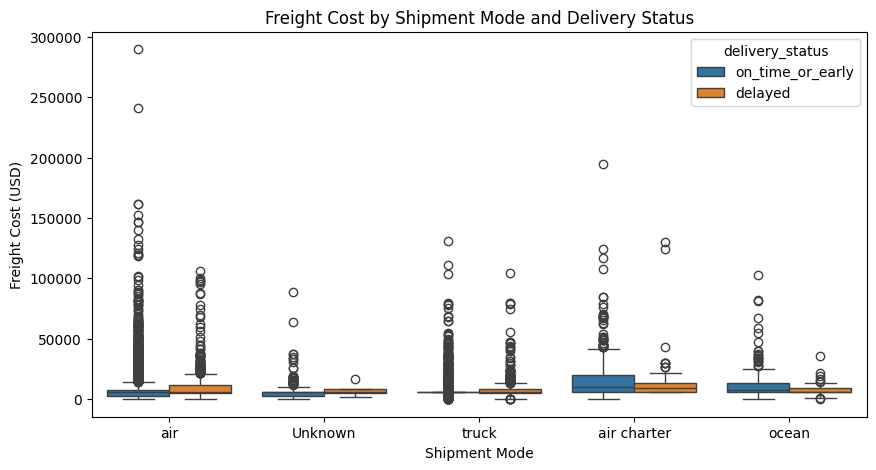

In [ ]:
# Chart 12: Freight Cost by Shipment Mode and Delivery Status

try:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='shipment_mode', y='freight_cost_usd', hue='delivery_status', data=df)
    plt.title("Freight Cost by Shipment Mode and Delivery Status")
    plt.xlabel("Shipment Mode")
    plt.ylabel("Freight Cost (USD)")
    plt.show()

except Exception as e:
    print("Error while generating Chart 12:", str(e))


##### 1. Why did you pick the specific chart?

This boxplot was chosen to compare freight cost distribution across shipment modes while also distinguishing between on-time and delayed deliveries. It helps understand whether delayed shipments tend to incur higher freight costs.

##### 2. What is/are the insight(s) found from the chart?

* For almost every shipment mode, delayed shipments have a higher median freight cost than on-time shipments.

* Air Charter and Ocean shipments show very large cost variations with several extreme outliers.

* Truck shipments have relatively lower freight cost spread compared to air and air charter.

* Delayed shipments clearly show more extreme high-cost values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help FedEx understand that delays are often linked with higher freight costs, meaning operational inefficiencies directly increase expenses.

However, shipment modes like Air Charter show extremely high freight cost outliers, which can lead to negative growth if delays continue in these expensive segments. Reducing delays in high-cost modes can significantly improve profitability.

#### Chart - 13

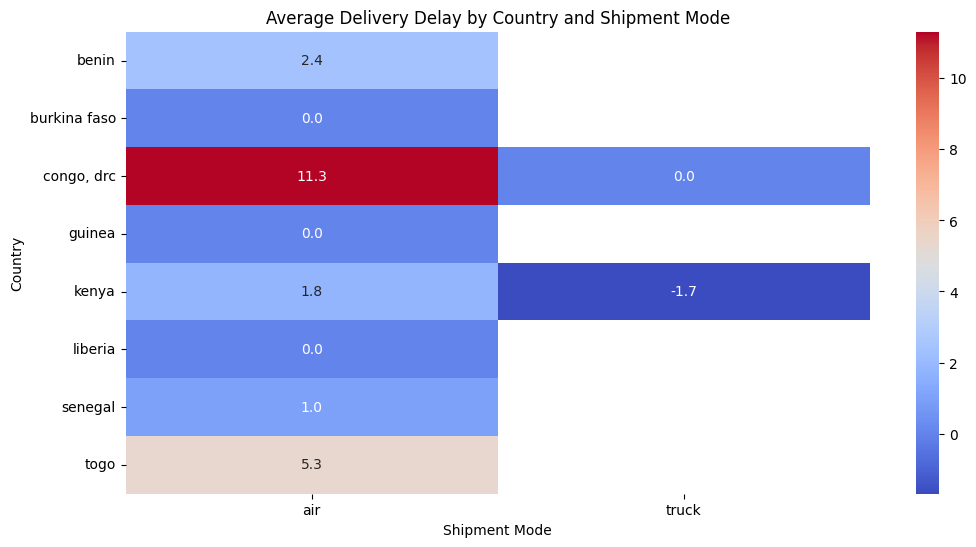

In [ ]:
# Chart 13: Delivery Delay by Country and Shipment Mode

try:
    top_countries = (
        df.groupby('country')['delivery_delay_days']
          .mean()
          .sort_values(ascending=False)
          .head(8)
          .index
    )

    filtered_df = df[df['country'].isin(top_countries)]

    pivot_table = filtered_df.pivot_table(
        values='delivery_delay_days',
        index='country',
        columns='shipment_mode',
        aggfunc='mean'
    )

    plt.figure(figsize=(12,6))
    sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='coolwarm')
    plt.title("Average Delivery Delay by Country and Shipment Mode")
    plt.xlabel("Shipment Mode")
    plt.ylabel("Country")
    plt.show()

except Exception as e:
    print("Error while generating Chart 13:", str(e))


##### 1. Why did you pick the specific chart?

This heatmap was selected to analyze how delivery delay varies across countries for different shipment modes. It helps identify country-specific logistics issues.

##### 2. What is/are the insight(s) found from the chart?

* Congo DRC with Air shipments shows the highest average delay of 11.3 days, making it the most problematic route.

* Togo (5.3 days) and Benin (2.4 days) also show noticeable air shipment delays.

* Truck shipments in Kenya show a negative delay (–1.7 days), meaning early or on-time delivery.

* Countries like Burkina Faso, Guinea, and Liberia show almost zero delay.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this analysis allows FedEx to focus improvement efforts on high-delay routes like Air shipments to Congo DRC and Togo.

However, countries such as Congo DRC pose a risk of negative growth because frequent delays can reduce customer trust and increase operational cost. These routes require immediate operational attention.

#### Chart - 14 - Correlation Heatmap

In [ ]:
num_cols = [
    'delivery_delay_days',
    'weight_kilograms',
    'freight_cost_usd',
    'line_item_value',
    'line_item_quantity',
    'line_item_insurance_usd'
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Replace invalid values with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


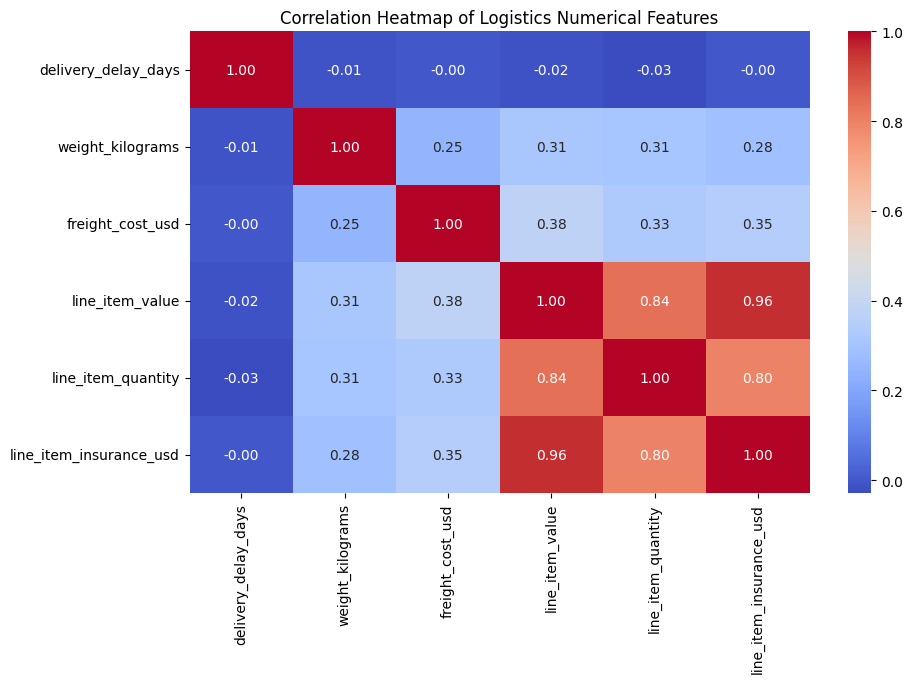

In [ ]:
# Chart 14: Correlation Heatmap

try:
    corr_cols = [
        'delivery_delay_days',
        'weight_kilograms',
        'freight_cost_usd',
        'line_item_value',
        'line_item_quantity',
        'line_item_insurance_usd'
    ]

    corr_matrix = df[corr_cols].corr()

    plt.figure(figsize=(10,6))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Heatmap of Logistics Numerical Features")
    plt.show()

except Exception as e:
    print("Error while generating Chart 14:", str(e))


**Heatmap Explation**

This heatmap helps us identify which factors move together. It clearly shows that insurance cost is driven mainly by item value and quantity, while delivery delays are influenced more by operational or regional factors rather than shipment size or price.”

##### 1. Why did you pick the specific chart?

This heatmap was chosen to understand the relationship between key numerical variables such as delivery delay, weight, freight cost, line item value, quantity, and insurance cost. It helps identify which factors move together.

##### 2. What is/are the insight(s) found from the chart?

* Line item value and insurance cost have a very strong correlation (0.96), meaning higher value items are insured for more amount.

* Line item quantity and line item value also show a strong correlation (0.84).

* Weight has moderate correlation with freight cost (0.25), showing heavier shipments usually cost more to transport.

* Delivery delay has almost zero correlation with all numerical variables, meaning delays are influenced more by operational factors rather than shipment size or value.

#### Chart - 15 - Pair Plot

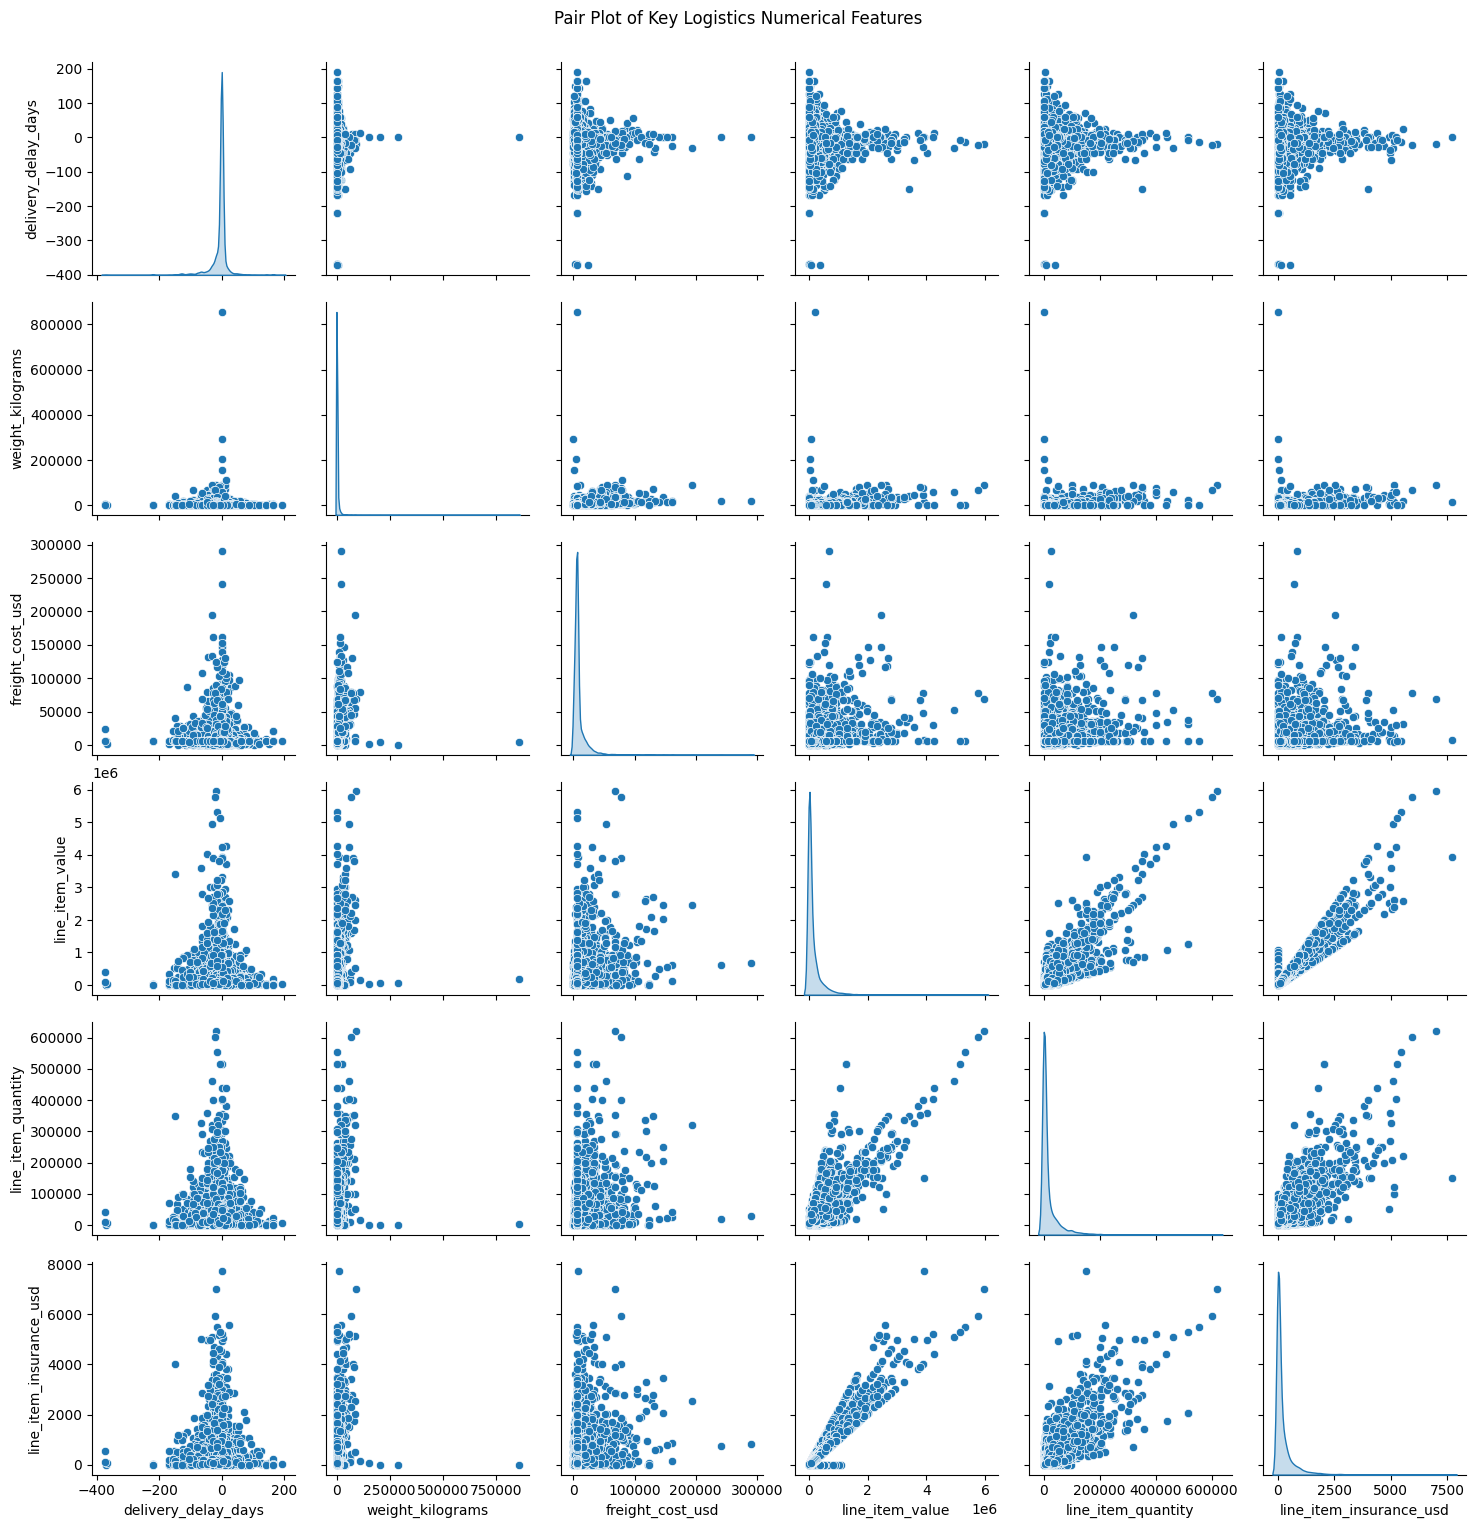

In [ ]:
# Chart 15: Pair Plot Visualization

try:
    pair_cols = [
        'delivery_delay_days',
        'weight_kilograms',
        'freight_cost_usd',
        'line_item_value',
        'line_item_quantity',
        'line_item_insurance_usd'
    ]

    sns.pairplot(df[pair_cols], diag_kind='kde')
    plt.suptitle("Pair Plot of Key Logistics Numerical Features", y=1.02)
    plt.show()

except Exception as e:
    print("Error while generating Chart 15:", str(e))


##### 1. Why did you pick the specific chart?

The pair plot was chosen to visualize relationships between multiple numerical variables at once. It helps identify patterns, correlations, trends, and outliers between delivery delay, weight, freight cost, item value, quantity, and insurance cost.

##### 2. What is/are the insight(s) found from the chart?

* Line item value, quantity, and insurance cost show a very strong positive relationship — as item value or quantity increases, insurance cost also increases.

* Freight cost increases with weight, but the spread shows that other factors also influence freight pricing.

* Delivery delay does not show a strong pattern with any numeric feature, confirming that delays depend more on operational factors rather than shipment size or value.

* Several outliers exist in weight, freight cost, and insurance cost, which represent unusually large shipments.

##Listing hypothesis/assumptions.

**Shipment mode affects delivery performance**

Shipments transported via ocean or air charter are more likely to be delayed compared to air and truck shipments.

**Vendor INCO terms influence freight cost**

Terms like EXW are assumed to increase freight responsibility on FedEx, resulting in higher freight costs.

**Country impacts delivery delay**

Certain countries face more delivery delays due to customs, infrastructure, or regulatory challenges.

**Shipment weight directly affects freight cost**

Heavier shipments are assumed to incur higher freight charges.

**High-value shipments have higher insurance cost**

As line item value increases, insurance cost is also expected to increase.

**Delivery delays are influenced by operational factors**

Delivery delays are assumed to depend more on shipment mode, country, and vendor responsibility rather than product dosage or brand

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Based on the complete analysis, the following actions are suggested to FedEx to improve delivery performance and reduce logistics cost:

**Optimize Shipment Mode Usage**

Air shipments are used the most and are also costly. FedEx should identify shipments that are not urgent and move them from air to truck or ocean mode to reduce freight expenses.

**Improve Operations in High-Delay Countries**

Countries such as Congo DRC, Togo, and Benin show high delivery delays. FedEx should review vendor partnerships, customs clearance processes, and routing strategies in these regions.

**Re-evaluate INCO Terms Strategy**

Heavy reliance on EXW increases freight responsibility and cost. Shifting towards seller-responsible INCO terms such as CIF or DDP where possible can help reduce financial burden.

**Control High-Cost Shipments**

Shipments with extremely high weight and freight cost should be flagged and reviewed separately to prevent cost leakage.

**Improve Data Quality**

Fields like “Unknown shipment mode” and inconsistent INCO term values should be corrected at the data entry stage to ensure reliable analysis and planning.



These steps will help FedEx reduce delays, control logistics costs, and improve customer satisfaction, directly supporting the project’s business objectives.

# **Conclusion**

This project successfully analyzed FedEx’s logistics shipment data to understand the key factors affecting delivery performance and freight cost. By performing detailed data cleaning, feature engineering, and visualization-based analysis, important operational patterns were identified.

The analysis showed that air shipments dominate the logistics process but also contribute significantly to high freight costs. Countries such as Congo DRC and Togo were found to have higher delivery delays, highlighting regional bottlenecks. INCO terms like EXW were associated with increased freight cost, indicating that contract structure has a strong impact on overall logistics expenses.

It was also observed that shipment weight and line item value have a strong influence on freight and insurance cost, while delivery delays are mainly driven by operational and regional factors rather than shipment size.

Overall, this project provides actionable insights that can help FedEx optimize shipment mode selection, improve vendor and regional performance, reduce unnecessary logistics costs, and enhance customer satisfaction.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***